In [2]:
#Imports we may need;  

import numpy as np  
import pandas as pd

import matplotlib.pyplot as plt

from datetime import datetime
from datetime import timedelta


In [3]:
#Reading .csv files into dataframes; 

BeneDF = pd.read_csv("Train_Beneficiarydata-1542865627584.csv")
InpatDF = pd.read_csv('Train_Inpatientdata-1542865627584.csv')
OutpatDF = pd.read_csv('Train_Outpatientdata-1542865627584.csv')
TrainDF = pd.read_csv('Train-1542865627584.csv')

BeneDF_original = BeneDF.copy()
InpatDF_original = BeneDF.copy()
OutpatDF_original = BeneDF.copy()
TrainDF_original = BeneDF.copy()

In [4]:
#Printing shapes of each df. 

print('BeneDF Shape' + str(BeneDF.shape))
print('InpatDF Shape' + str(InpatDF.shape))
print('OutpatDF Shape' + str(OutpatDF.shape))
print('TrainDF Shape' + str(TrainDF.shape))


BeneDF Shape(138556, 25)
InpatDF Shape(40474, 30)
OutpatDF Shape(517737, 27)
TrainDF Shape(5410, 2)


In [5]:
# Take a look at the head of each df to get a sense of the data & columns. Not all columns are shown in the head. 
# 'BeneID' is a common column between BeneDF and InpatDF and OutpatDF. 'Provider' is a common column between TrainDF and InpatDF and OutpatDF. 
# This will be important for joining the dfs later on.

BeneDF.head(10)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
5,BENE11006,1976-09-01,NaN,2,1,0,23,810,12,12,...,2,2,2,2,2,2,0,0,500,0
6,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
7,BENE11008,1934-02-01,NaN,2,1,0,15,140,12,12,...,2,1,2,2,2,2,0,0,30,0
8,BENE11009,1929-06-01,NaN,1,1,Y,44,230,12,12,...,2,1,2,2,2,2,0,0,100,0
9,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,2,1,1,1,2,2,0,0,1170,660


In [6]:

InpatDF.head(10)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,2009-10-06,...,2948,25000,25002,NaN,863.0,NaN,NaN,NaN,NaN,NaN
6,BENE11018,CLM32075,2009-01-02,2009-01-07,PRV54090,8000,PHY412314,PHY347494,NaN,2009-01-02,...,2948,2809,56210,NaN,4576.0,NaN,NaN,NaN,NaN,NaN
7,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,NaN,2009-08-03,...,2851,4439,41401,NaN,9904.0,NaN,NaN,NaN,NaN,NaN
8,BENE11031,CLM62784,2009-08-06,2009-08-09,PRV55839,7000,PHY385030,NaN,NaN,2009-08-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,NaN,2008-12-29,...,4019,4111,4589,NaN,3612.0,4139.0,NaN,NaN,NaN,NaN


In [7]:
OutpatDF.head(10)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
5,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
6,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
7,BENE11004,CLM252512,2009-03-18,2009-03-18,PRV56011,200,PHY346833,NaN,PHY346833,72290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
8,BENE11004,CLM322683,2009-04-25,2009-05-15,PRV56011,60,PHY372925,NaN,PHY311407,71856,...,71596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
9,BENE11004,CLM339500,2009-05-04,2009-05-16,PRV56011,500,PHY412904,NaN,PHY396473,7237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [8]:
TrainDF.head(10)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
5,PRV51008,No
6,PRV51011,No
7,PRV51012,No
8,PRV51013,No
9,PRV51014,No


In [9]:
#Taking a look at the .info of each df to see all the columns, datatypes, and get a sense of missing values.

# Some things noticed in BeneDF: Column names all look good; DOD has missing values which makes sense as only a few of the beneficiaries died. DOB and DOD
# are 'object' type variables; we may want to change these to date/time variables. Gender is int (0,1), assume 0 male and 1 female? Race is int,
# State and County are int and not strings so they are numbered as well. No legend to decode these.Not 100% sure what some of the columns mean but hope
# to figure it out as we keep looking at the data. 


BeneDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [10]:
BeneDF['Race'].unique()


array([1, 2, 3, 5], dtype=int64)

In [11]:
#From google search, End-Stage Renal Disease Indicator, 'Y' - The beneficiary has ESRD, '0' The beneficiary does not have ESRD.We may want to change the
#'Y' to '1' so this becomes and int variable.

BeneDF['RenalDiseaseIndicator'].unique()


array(['0', 'Y'], dtype=object)

In [12]:
#Converting the DOB and DOD to datetime objects.

BeneDF['DOB'] = pd.to_datetime(BeneDF['DOB'])
BeneDF['DOD'] = pd.to_datetime(BeneDF['DOD'])
BeneDF.info()
#It worked.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           138556 non-null  object        
 1   DOB                              138556 non-null  datetime64[ns]
 2   DOD                              1421 non-null    datetime64[ns]
 3   Gender                           138556 non-null  int64         
 4   Race                             138556 non-null  int64         
 5   RenalDiseaseIndicator            138556 non-null  object        
 6   State                            138556 non-null  int64         
 7   County                           138556 non-null  int64         
 8   NoOfMonths_PartACov              138556 non-null  int64         
 9   NoOfMonths_PartBCov              138556 non-null  int64         
 10  ChronicCond_Alzheimer            138556 non-

In [13]:
# Lots of missing values in DOD

In [14]:
BeneDF.isna().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

In [15]:
BeneDF["DOD"].max()

Timestamp('2009-12-01 00:00:00')

In [16]:
BeneDF["DOD"].min()


Timestamp('2009-02-01 00:00:00')

In [17]:
BeneDF["DOD"].nunique()

11

In [18]:
BeneDF["DOD"].unique()

#Looks like everyone died between Feb 2009 and Dec 2009

array([                          'NaT', '2009-12-01T00:00:00.000000000',
       '2009-09-01T00:00:00.000000000', '2009-05-01T00:00:00.000000000',
       '2009-07-01T00:00:00.000000000', '2009-08-01T00:00:00.000000000',
       '2009-10-01T00:00:00.000000000', '2009-06-01T00:00:00.000000000',
       '2009-04-01T00:00:00.000000000', '2009-02-01T00:00:00.000000000',
       '2009-11-01T00:00:00.000000000', '2009-03-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [19]:
#Create a new column to calculate 'Age'

BeneDF["Age"] = round(((BeneDF["DOD"] - BeneDF["DOB"]).dt.days)/365)
BeneDF

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,...,1,1,2,1,1,36000,3204,60,70,NaN
1,BENE11002,1936-09-01,NaT,2,1,0,39,280,12,12,...,2,2,2,2,2,0,0,30,50,NaN
2,BENE11003,1936-08-01,NaT,1,1,0,52,590,12,12,...,2,1,2,2,2,0,0,90,40,NaN
3,BENE11004,1922-07-01,NaT,1,1,0,39,270,12,12,...,1,1,1,1,2,0,0,1810,760,NaN
4,BENE11005,1935-09-01,NaT,1,1,0,24,680,12,12,...,1,2,2,2,2,0,0,1790,1200,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaT,1,1,0,39,140,12,12,...,2,2,2,2,2,0,0,430,460,NaN
138552,BENE159195,1938-12-01,NaT,2,1,0,49,530,12,12,...,1,2,2,2,2,0,0,880,100,NaN
138553,BENE159196,1916-06-01,NaT,2,1,0,6,150,12,12,...,1,1,2,2,2,2000,1068,3240,1390,NaN
138554,BENE159197,1930-01-01,NaT,1,1,0,16,560,12,12,...,2,1,2,2,2,0,0,2650,10,NaN


In [20]:
# Lots of Ages are NaN because there were only a few DODs, not everyone died. Calculate age as of 2009-12-01 for the remainder.

BeneDF["Age"].fillna(round(((pd.to_datetime('2009-12-01')-BeneDF["DOB"]).dt.days)/365),inplace=True)
BeneDF

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,...,1,1,2,1,1,36000,3204,60,70,67.0
1,BENE11002,1936-09-01,NaT,2,1,0,39,280,12,12,...,2,2,2,2,2,0,0,30,50,73.0
2,BENE11003,1936-08-01,NaT,1,1,0,52,590,12,12,...,2,1,2,2,2,0,0,90,40,73.0
3,BENE11004,1922-07-01,NaT,1,1,0,39,270,12,12,...,1,1,1,1,2,0,0,1810,760,87.0
4,BENE11005,1935-09-01,NaT,1,1,0,24,680,12,12,...,1,2,2,2,2,0,0,1790,1200,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaT,1,1,0,39,140,12,12,...,2,2,2,2,2,0,0,430,460,70.0
138552,BENE159195,1938-12-01,NaT,2,1,0,49,530,12,12,...,1,2,2,2,2,0,0,880,100,71.0
138553,BENE159196,1916-06-01,NaT,2,1,0,6,150,12,12,...,1,1,2,2,2,2000,1068,3240,1390,94.0
138554,BENE159197,1930-01-01,NaT,1,1,0,16,560,12,12,...,2,1,2,2,2,0,0,2650,10,80.0


In [21]:
#New column to show who died. True if they died, false if they lived.
BeneDF["Died"] =  BeneDF["DOD"].notnull()
BeneDF

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Died
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,...,1,2,1,1,36000,3204,60,70,67.0,False
1,BENE11002,1936-09-01,NaT,2,1,0,39,280,12,12,...,2,2,2,2,0,0,30,50,73.0,False
2,BENE11003,1936-08-01,NaT,1,1,0,52,590,12,12,...,1,2,2,2,0,0,90,40,73.0,False
3,BENE11004,1922-07-01,NaT,1,1,0,39,270,12,12,...,1,1,1,2,0,0,1810,760,87.0,False
4,BENE11005,1935-09-01,NaT,1,1,0,24,680,12,12,...,2,2,2,2,0,0,1790,1200,74.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaT,1,1,0,39,140,12,12,...,2,2,2,2,0,0,430,460,70.0,False
138552,BENE159195,1938-12-01,NaT,2,1,0,49,530,12,12,...,2,2,2,2,0,0,880,100,71.0,False
138553,BENE159196,1916-06-01,NaT,2,1,0,6,150,12,12,...,1,2,2,2,2000,1068,3240,1390,94.0,False
138554,BENE159197,1930-01-01,NaT,1,1,0,16,560,12,12,...,1,2,2,2,0,0,2650,10,80.0,False


In [22]:
#Filter of those who died.
BeneDF[BeneDF["Died"]==True]

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Died
6,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,1,2,0,0,1490,160,69.0,True
206,BENE11217,1939-07-01,2009-09-01,1,3,Y,5,160,12,12,...,1,1,1,2,0,0,3880,650,70.0,True
207,BENE11218,1928-12-01,2009-09-01,1,1,0,14,141,12,12,...,1,1,2,1,19000,1068,110,50,81.0,True
219,BENE11231,1937-12-01,2009-05-01,2,2,0,45,810,12,12,...,1,1,2,2,4000,1068,300,30,71.0,True
525,BENE11558,1927-12-01,2009-12-01,2,1,0,14,141,12,12,...,1,2,2,2,0,0,50,80,82.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137494,BENE158067,1939-06-01,2009-08-01,2,1,0,10,400,12,12,...,1,1,2,2,7000,1068,1190,320,70.0,True
137497,BENE158070,1919-11-01,2009-06-01,2,1,0,33,420,12,12,...,1,2,2,2,0,0,40,0,90.0,True
137682,BENE158266,1929-07-01,2009-12-01,1,3,0,5,400,12,12,...,1,2,1,2,20200,1068,2220,250,80.0,True
137859,BENE158455,1932-08-01,2009-05-01,1,1,0,21,10,12,12,...,2,2,2,2,4000,1068,0,0,77.0,True


In [23]:
#Replacing the 'Y' for renal disease indicator to '1', Replacing '0' with 0 to get type int.
BeneDF.replace(to_replace = 'Y', value = 1, inplace=True)
BeneDF.replace(to_replace = '0', value = 0, inplace=True)
BeneDF['RenalDiseaseIndicator'].unique()

array([0, 1], dtype=int64)

In [24]:
#Check to make sure all BeneIDs are unique in this dataframe.They are.
BeneDF["BeneID"].nunique()

138556

In [25]:
#Dates are objects, we may want to convert to date/time objects. Missing values in several columns. 

InpatDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [26]:
InpatDF["ClaimStartDt"] = pd.to_datetime(InpatDF["ClaimStartDt"])
InpatDF["ClaimEndDt"] = pd.to_datetime(InpatDF["ClaimEndDt"])
InpatDF["AdmissionDt"] = pd.to_datetime(InpatDF["AdmissionDt"])
InpatDF["DischargeDt"] = pd.to_datetime(InpatDF["DischargeDt"])

In [27]:
InpatDF['time_in_hospital'] = InpatDF['DischargeDt'] - InpatDF['AdmissionDt']+ timedelta(days = 1)
InpatDF.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,time_in_hospital
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7 days
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,3 days
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 days
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,9 days
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,18 days


In [28]:
OutpatDF["ClaimStartDt"] = pd.to_datetime(OutpatDF["ClaimStartDt"])
OutpatDF["ClaimEndDt"] = pd.to_datetime(OutpatDF["ClaimEndDt"])

OutpatDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   BeneID                  517737 non-null  object        
 1   ClaimID                 517737 non-null  object        
 2   ClaimStartDt            517737 non-null  datetime64[ns]
 3   ClaimEndDt              517737 non-null  datetime64[ns]
 4   Provider                517737 non-null  object        
 5   InscClaimAmtReimbursed  517737 non-null  int64         
 6   AttendingPhysician      516341 non-null  object        
 7   OperatingPhysician      90617 non-null   object        
 8   OtherPhysician          195046 non-null  object        
 9   ClmDiagnosisCode_1      507284 non-null  object        
 10  ClmDiagnosisCode_2      322357 non-null  object        
 11  ClmDiagnosisCode_3      203257 non-null  object        
 12  ClmDiagnosisCode_4      125596

In [29]:
#Most of the columns are the same, so let's join the Inpat and Outpat DFs before dealing with missing values.To add the two dataframes,
#need to have all columns the same.

#first, find a list of the columns for each:
outCols = OutpatDF.columns
inCols = InpatDF.columns

diffs = inCols.difference(outCols).tolist()
diffs
#Admission and Discharge columns are not present in outpatients group because they are not admitted to hospital. 

['AdmissionDt', 'DiagnosisGroupCode', 'DischargeDt', 'time_in_hospital']

In [30]:
#Add these columns to OutPatDF, and fill them with NaN for now.

for col in diffs:
    OutpatDF[col] = np.nan
    
OutpatDF

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DiagnosisGroupCode,DischargeDt,time_in_hospital
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,0,56409,NaN,NaN,NaN,NaN
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,0,79380,NaN,NaN,NaN,NaN
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,0,71947,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,07041,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,V570,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [31]:
#Now add the two dataframes together to get a single dataframe for both inpatient and outpatient claims. Can separate them later if needed by filtering on admission date
#as the outpatient data has Nan for Admission and Discharge dates.

patDF = InpatDF.append(OutpatDF)
patDF


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,time_in_hospital
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12 00:00:00,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7 days 00:00:00
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31 00:00:00,...,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,3 days 00:00:00
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 days 00:00:00
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14 00:00:00,...,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,9 days 00:00:00
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13 00:00:00,...,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,18 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#Adding in the beneficiary info from the BeneID dataframe. ***Joining the BeneDF to the patDF causes a lot of duplicate values in some columns so I'm
#taking it out for now.



#Pat_BeneDF = patDF.merge(BeneDF, on = 'BeneID', how='outer')
#Pat_BeneDF


In [33]:
#Pat_BeneDF.info()

In [34]:
#Add in the Train DF to the patDF so we have the 'Potential Fraud' column. All DFs except the BeneDF are now combined into one.

PatTrainDF = patDF.merge(TrainDF, on = 'Provider', how='outer')
PatTrainDF

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,time_in_hospital,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12 00:00:00,...,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7 days 00:00:00,Yes
1,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20 00:00:00,...,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,13 days 00:00:00,Yes
2,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17 00:00:00,...,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,19 days 00:00:00,Yes
3,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25 00:00:00,...,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,5 days 00:00:00,Yes
4,BENE24402,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,NaN,2009-01-08 00:00:00,...,NaN,NaN,8543.0,NaN,NaN,NaN,NaN,NaN,5 days 00:00:00,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE154687,CLM184358,2009-02-08,2009-02-08,PRV54302,3300,PHY376238,PHY376238,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
558207,BENE157252,CLM603185,2009-09-28,2009-09-28,PRV57762,1900,PHY432730,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
558208,BENE157378,CLM460770,2009-07-09,2009-07-29,PRV51577,2100,PHY338096,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
558209,BENE158295,CLM306999,2009-04-16,2009-04-16,PRV53083,10,PHY416646,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


In [35]:
#PatTrainDF.info()
PatTrainDF['AttendingPhysician'].value_counts().head(100)


PHY330576    2534
PHY350277    1628
PHY412132    1321
PHY423534    1223
PHY314027    1200
             ... 
PHY319973     326
PHY341671     323
PHY377766     322
PHY422235     321
PHY313818     319
Name: AttendingPhysician, Length: 100, dtype: int64

In [36]:
total = len(InpatDF) + len(OutpatDF)
total

558211

In [37]:
len(PatTrainDF)

558211

In [38]:
PatTrainDF.isnull().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1508
OperatingPhysician        443764
OtherPhysician            358475
AdmissionDt               517737
ClmAdmitDiagnosisCode     412312
DeductibleAmtPaid            899
DischargeDt               517737
DiagnosisGroupCode        517737
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195606
ClmDiagnosisCode_3        315156
ClmDiagnosisCode_4        393675
ClmDiagnosisCode_5        446287
ClmDiagnosisCode_6        473819
ClmDiagnosisCode_7        492034
ClmDiagnosisCode_8        504767
ClmDiagnosisCode_9        516396
ClmDiagnosisCode_10       553201
ClmProcedureCode_1        534901
ClmProcedureCode_2        552721
ClmProcedureCode_3        557242
ClmProcedureCode_4        558093
ClmProcedureCode_5        558202
ClmProcedureCode_6        558211
time_in_ho

In [39]:
PatTrainDF['AttendingPhysician'].nunique()

82063

In [40]:
# These lines of code are here if you end up wanting to look at both which physicians are associated with fraud and
# whether having more or less physicians assigned to the claim is linked to fraud. Just deleted the # and restart the kernel.

#PatTrainDF['AttendingPhysician2'] = PatTrainDF['AttendingPhysician']
#PatTrainDF['OperatingPhysician2'] = PatTrainDF['OperatingPhysician']
#PatTrainDF['OtherPhysician2'] = PatTrainDF['OtherPhysician']

In [41]:
##Lots of different doctors, assume it doesn't matter which doctor, just whether or not there was a doctor. Replace the notNAs with 1, and NAs with 0 for
#all physician fields.

PatTrainDF['AttendingPhysician'] = np.where(PatTrainDF['AttendingPhysician'].isna(),0,1)



In [42]:
PatTrainDF['AttendingPhysician'].value_counts()

1    556703
0      1508
Name: AttendingPhysician, dtype: int64

In [43]:
PatTrainDF['OperatingPhysician'] = np.where(PatTrainDF['OperatingPhysician'].isna(),0,1)
PatTrainDF['OtherPhysician'] = np.where(PatTrainDF['OtherPhysician'].isna(),0,1)

In [44]:
#Create a new column for number of physicians

PatTrainDF['Num_of_Physicians'] = PatTrainDF['AttendingPhysician'] + PatTrainDF['OperatingPhysician'] + PatTrainDF['OtherPhysician']
PatTrainDF['Num_of_Physicians']


0         1
1         3
2         2
3         3
4         2
         ..
558206    2
558207    1
558208    1
558209    1
558210    2
Name: Num_of_Physicians, Length: 558211, dtype: int32

In [45]:
PatTrainDF.isna().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician             0
OperatingPhysician             0
OtherPhysician                 0
AdmissionDt               517737
ClmAdmitDiagnosisCode     412312
DeductibleAmtPaid            899
DischargeDt               517737
DiagnosisGroupCode        517737
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195606
ClmDiagnosisCode_3        315156
ClmDiagnosisCode_4        393675
ClmDiagnosisCode_5        446287
ClmDiagnosisCode_6        473819
ClmDiagnosisCode_7        492034
ClmDiagnosisCode_8        504767
ClmDiagnosisCode_9        516396
ClmDiagnosisCode_10       553201
ClmProcedureCode_1        534901
ClmProcedureCode_2        552721
ClmProcedureCode_3        557242
ClmProcedureCode_4        558093
ClmProcedureCode_5        558202
ClmProcedureCode_6        558211
time_in_ho

In [46]:
PatTrainDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   BeneID                  558211 non-null  object        
 1   ClaimID                 558211 non-null  object        
 2   ClaimStartDt            558211 non-null  datetime64[ns]
 3   ClaimEndDt              558211 non-null  datetime64[ns]
 4   Provider                558211 non-null  object        
 5   InscClaimAmtReimbursed  558211 non-null  int64         
 6   AttendingPhysician      558211 non-null  int32         
 7   OperatingPhysician      558211 non-null  int32         
 8   OtherPhysician          558211 non-null  int32         
 9   AdmissionDt             40474 non-null   object        
 10  ClmAdmitDiagnosisCode   145899 non-null  object        
 11  DeductibleAmtPaid       557312 non-null  float64       
 12  DischargeDt             40474 

In [47]:
#We have lots of null values in 'ClmAdmitDiagnosisCode'  I printed the list of them but there are lots of unique values in this column
#Fill na with 0 for now.
#PatTrainDF['ClmAdmitDiagnosisCode'].unique().tolist()
PatTrainDF['ClmAdmitDiagnosisCode'].fillna(0,inplace=True)
PatTrainDF.isna().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician             0
OperatingPhysician             0
OtherPhysician                 0
AdmissionDt               517737
ClmAdmitDiagnosisCode          0
DeductibleAmtPaid            899
DischargeDt               517737
DiagnosisGroupCode        517737
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195606
ClmDiagnosisCode_3        315156
ClmDiagnosisCode_4        393675
ClmDiagnosisCode_5        446287
ClmDiagnosisCode_6        473819
ClmDiagnosisCode_7        492034
ClmDiagnosisCode_8        504767
ClmDiagnosisCode_9        516396
ClmDiagnosisCode_10       553201
ClmProcedureCode_1        534901
ClmProcedureCode_2        552721
ClmProcedureCode_3        557242
ClmProcedureCode_4        558093
ClmProcedureCode_5        558202
ClmProcedureCode_6        558211
time_in_ho

In [48]:
print(PatTrainDF['DeductibleAmtPaid'].nunique())
PatTrainDF['DeductibleAmtPaid'].value_counts()

#Only 17 unique values in this column. Most of the values are '0.0'. We can fillnas with '0'

17


0.0       496701
1068.0     39575
100.0       4582
70.0        2420
60.0        2065
40.0        2045
80.0        2024
50.0        1969
20.0        1406
30.0        1336
90.0        1245
10.0        1203
200.0        734
897.0          2
876.0          2
865.0          2
886.0          1
Name: DeductibleAmtPaid, dtype: int64

In [49]:
PatTrainDF['DeductibleAmtPaid'].fillna(0,inplace=True)

In [50]:
PatTrainDF.isna().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician             0
OperatingPhysician             0
OtherPhysician                 0
AdmissionDt               517737
ClmAdmitDiagnosisCode          0
DeductibleAmtPaid              0
DischargeDt               517737
DiagnosisGroupCode        517737
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195606
ClmDiagnosisCode_3        315156
ClmDiagnosisCode_4        393675
ClmDiagnosisCode_5        446287
ClmDiagnosisCode_6        473819
ClmDiagnosisCode_7        492034
ClmDiagnosisCode_8        504767
ClmDiagnosisCode_9        516396
ClmDiagnosisCode_10       553201
ClmProcedureCode_1        534901
ClmProcedureCode_2        552721
ClmProcedureCode_3        557242
ClmProcedureCode_4        558093
ClmProcedureCode_5        558202
ClmProcedureCode_6        558211
time_in_ho

In [51]:
#All values in 'ClmProcedureCode_6' are NaN so let's drop that column.
PatTrainDF.drop('ClmProcedureCode_6', axis=1,inplace=True)

In [52]:
#Fill the NaNs in the remaining ClmDiagnosisCode and ClmProcedureCode with 0.

cols = ['ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10','ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5']

#I thought this would work, not sure why it didn't:

#PatTrainDF[cols].fillna(0, axis= 1, inplace=True)

#Did a search and found this and it worked:
PatTrainDF.update(PatTrainDF[cols].fillna(0))

In [53]:
PatTrainDF.head(20)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,time_in_hospital,PotentialFraud,Num_of_Physicians
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,1,0,0,2009-04-12 00:00:00,...,5849,0,0.0,0.0,0.0,0.0,0.0,7 days 00:00:00,Yes,1
1,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,1,1,1,2009-01-20 00:00:00,...,E9305,0,7769.0,5849.0,0.0,0.0,0.0,13 days 00:00:00,Yes,3
2,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,1,1,0,2009-10-17 00:00:00,...,4019,0,9338.0,0.0,0.0,0.0,0.0,19 days 00:00:00,Yes,2
3,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,1,1,1,2009-10-25 00:00:00,...,0,0,8154.0,0.0,0.0,0.0,0.0,5 days 00:00:00,Yes,3
4,BENE24402,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,1,1,0,2009-01-08 00:00:00,...,0,0,8543.0,0.0,0.0,0.0,0.0,5 days 00:00:00,Yes,2
5,BENE28966,CLM56700,2009-06-22,2009-06-25,PRV55912,10000,1,1,0,2009-06-22 00:00:00,...,42611,32723,3327.0,0.0,0.0,0.0,0.0,4 days 00:00:00,Yes,2
6,BENE29251,CLM42062,2009-03-11,2009-03-19,PRV55912,18000,1,0,0,2009-03-11 00:00:00,...,82525,0,0.0,0.0,0.0,0.0,0.0,9 days 00:00:00,Yes,1
7,BENE31905,CLM37729,2009-02-10,2009-03-03,PRV55912,13000,1,1,1,2009-02-10 00:00:00,...,40390,0,3995.0,0.0,0.0,0.0,0.0,22 days 00:00:00,Yes,3
8,BENE31905,CLM49964,2009-05-06,2009-05-09,PRV55912,7000,1,0,0,2009-05-06 00:00:00,...,0,0,0.0,0.0,0.0,0.0,0.0,4 days 00:00:00,Yes,1
9,BENE31905,CLM77968,2009-12-01,2009-12-05,PRV55912,7000,1,0,0,2009-12-01 00:00:00,...,4019,0,0.0,0.0,0.0,0.0,0.0,5 days 00:00:00,Yes,1


In [54]:
PatTrainDF.isnull().sum()

#The number of missing values for Admission Date, Discharge Date, time_in_hospital and Diagnosis Group are all the same, these are the columns that were only in the outpatient DF.
#I think we can leave these as 'na' values.

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician             0
OperatingPhysician             0
OtherPhysician                 0
AdmissionDt               517737
ClmAdmitDiagnosisCode          0
DeductibleAmtPaid              0
DischargeDt               517737
DiagnosisGroupCode        517737
ClmDiagnosisCode_1             0
ClmDiagnosisCode_2             0
ClmDiagnosisCode_3             0
ClmDiagnosisCode_4             0
ClmDiagnosisCode_5             0
ClmDiagnosisCode_6             0
ClmDiagnosisCode_7             0
ClmDiagnosisCode_8             0
ClmDiagnosisCode_9             0
ClmDiagnosisCode_10            0
ClmProcedureCode_1             0
ClmProcedureCode_2             0
ClmProcedureCode_3             0
ClmProcedureCode_4             0
ClmProcedureCode_5             0
time_in_hospital          517737
PotentialF

In [55]:
BeneDF.isna().sum()
#This DF still has nas in DOD but that is becasue not everyone died so it makes sense that they are na. 

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

In [56]:
#This DF is all four combined, but beware, because there are multiple instances of each 'BeneID' the values from the BeneDF are repeated so any sums on those columns will be inflated.
#See the .describe outputs below.

MegaTrainDF = PatTrainDF.merge(BeneDF, on = 'BeneID',how='outer')
MegaTrainDF

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Died
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,1,0,0,2009-04-12 00:00:00,...,1,2,1,1,36000,3204,60,70,67.0,False
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,1,1,0,2009-08-31 00:00:00,...,1,2,1,1,36000,3204,60,70,67.0,False
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,1,0,1,2009-09-17 00:00:00,...,1,2,1,1,36000,3204,60,70,67.0,False
3,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,1,1,1,2009-01-20 00:00:00,...,1,2,2,2,19000,1068,100,20,96.0,False
4,BENE17521,CLM119066,2009-01-04,2009-01-04,PRV55950,100,1,0,1,NaN,...,1,2,2,2,19000,1068,100,20,96.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE137034,CLM709479,2009-12-01,2009-12-01,PRV51666,50,1,0,1,NaN,...,2,2,2,2,0,0,50,100,49.0,False
558207,BENE137593,CLM685197,2009-11-16,2009-11-16,PRV55089,400,1,0,1,NaN,...,2,2,2,2,0,0,400,600,81.0,False
558208,BENE138363,CLM359448,2009-05-14,2009-05-14,PRV52754,10,1,0,0,NaN,...,2,2,2,2,0,0,10,0,79.0,False
558209,BENE157238,CLM119946,2009-01-04,2009-01-04,PRV55744,70,1,0,0,NaN,...,2,2,2,2,0,0,70,0,75.0,False


In [57]:
MegaTrainDF["AdmissionDt"] = pd.to_datetime(MegaTrainDF["AdmissionDt"])
MegaTrainDF["DischargeDt"] = pd.to_datetime(MegaTrainDF["DischargeDt"])

In [58]:
MegaTrainDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 58 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  object        
 1   ClaimID                          558211 non-null  object        
 2   ClaimStartDt                     558211 non-null  datetime64[ns]
 3   ClaimEndDt                       558211 non-null  datetime64[ns]
 4   Provider                         558211 non-null  object        
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   AttendingPhysician               558211 non-null  int32         
 7   OperatingPhysician               558211 non-null  int32         
 8   OtherPhysician                   558211 non-null  int32         
 9   AdmissionDt                      40474 non-null   datetime64[ns]
 10  ClmAdmitDiagnosisCode            558211 non-

In [59]:
pd.set_option("display.max_columns", None)
MegaTrainDF.head(20)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,time_in_hospital,PotentialFraud,Num_of_Physicians,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Died
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,1,0,0,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,0,0.0,0.0,0.0,0.0,0.0,7 days 00:00:00,Yes,1,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,67.0,False
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,1,1,0,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,0,0,0,0,0,0,0,7092.0,0.0,0.0,0.0,0.0,3 days 00:00:00,No,2,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,67.0,False
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,1,0,1,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4 days 00:00:00,No,2,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,67.0,False
3,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,1,1,1,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,0,7769.0,5849.0,0.0,0.0,0.0,13 days 00:00:00,Yes,3,1913-12-01,NaT,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,96.0,False
4,BENE17521,CLM119066,2009-01-04,2009-01-04,PRV55950,100,1,0,1,NaT,0,0.0,NaT,NaN,4919,1629,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,NaN,No,2,1913-12-01,NaT,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,96.0,False
5,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,1,1,0,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,0,9338.0,0.0,0.0,0.0,0.0,19 days 00:00:00,Yes,2,1922-10-01,NaT,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,87.0,False
6,BENE21718,CLM122795,2009-01-06,2009-01-06,PRV55931,40,1,1,0,NaT,70711,0.0,NaT,NaN,70712,27549,25000,41400,25072,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,NaN,No,2,1922-10-01,NaT,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,87.0,False
7,BENE21718,CLM466114,2009-07-12,2009-07-12,PRV55931,1000,1,0,1,NaT,0,0.0,NaT,NaN,36615,42731,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,NaN,No,2,1922-10-01,NaT,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,87.0,False
8,BENE21718,CLM547991,2009-08-27,2009-08-27,PRV55931,10,1,0,1,NaT,0,0.0,NaT,NaN,V5871,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,NaN,No,2,1922-10-01,NaT,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,87.0,False
9,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,1,1,1,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,0,0,0,8154.0,0.0,0.0,0.0,0.0,5 days 00:00:00,Yes,3,1930-07-01,NaT,2,1,0,39,280,12,12,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,79.0,False


In [60]:
PatTrainDF.describe()


,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,Num_of_Physicians
count,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.00000,558211.000000,558211.000000,558211.000000
mean,997.012133,0.997299,0.205025,0.357815,78.294788,246.214002,40.385994,7.32746,0.860411,0.084959,1.560138
std,3821.534891,0.051906,0.403720,0.479358,273.814128,1334.040239,452.543763,199.76420,66.118097,23.631448,0.639954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,40.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
50%,80.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,300.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000
max,125000.000000,1.000000,1.000000,1.000000,1068.000000,9999.000000,9999.000000,9999.00000,9986.000000,9982.000000,3.000000


In [61]:
BeneDF.describe()

,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
count,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
mean,1.570932,1.254511,0.141300,25.666734,374.424745,11.907727,11.910145,1.667817,1.506322,1.687643,1.880041,1.762847,1.644476,1.398142,1.324143,1.725317,1.743180,1.920942,3660.346502,399.847296,1298.219348,377.718258,73.622831
std,0.494945,0.717007,0.348332,15.223443,266.277581,1.032332,0.936893,0.470998,0.499962,0.463456,0.324914,0.425339,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.621827,956.175202,2493.901134,645.530187,12.733335
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000,26.000000
25%,1.000000,1.000000,0.000000,11.000000,141.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,170.000000,40.000000,68.000000
50%,2.000000,1.000000,0.000000,25.000000,340.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,570.000000,170.000000,74.000000
75%,2.000000,1.000000,0.000000,39.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2280.000000,1068.000000,1500.000000,460.000000,82.000000
max,2.000000,5.000000,1.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000,101.000000


In [62]:
#Notice the counts and means in the 'IPAnnualReimbursementAmt' columns & others in this DF are larger than those in the BeneDF. 

MegaTrainDF.describe()

,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,Num_of_Physicians,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
count,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.00000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.00000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000
mean,997.012133,0.997299,0.205025,0.357815,78.294788,246.214002,40.385994,7.32746,0.860411,0.084959,1.560138,1.578838,1.255011,0.196786,25.446969,378.588195,11.931472,11.93877,1.598132,1.409573,1.587998,1.848615,1.687070,1.565193,1.294605,1.240735,1.682353,1.688829,1.898280,5227.971466,568.756807,2278.225348,649.698745,73.769770
std,3821.534891,0.051906,0.403720,0.479358,273.814128,1334.040239,452.543763,199.76420,66.118097,23.631448,0.639954,0.493746,0.717437,0.397569,15.192784,265.215531,0.889712,0.78590,0.490276,0.491755,0.492196,0.358424,0.463687,0.495732,0.455866,0.427530,0.465562,0.462973,0.302279,11786.274732,1179.172616,3881.846386,1002.020811,13.022524
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000,26.000000
25%,40.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,150.000000,12.000000,12.00000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,460.000000,120.000000,68.000000
50%,80.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,24.000000,350.000000,12.000000,12.00000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1170.000000,340.000000,75.000000
75%,300.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,2.000000,1.000000,0.000000,38.000000,570.000000,12.000000,12.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,6000.000000,1068.000000,2590.000000,790.000000,82.000000
max,125000.000000,1.000000,1.000000,1.000000,1068.000000,9999.000000,9999.000000,9999.00000,9986.000000,9982.000000,3.000000,2.000000,5.000000,1.000000,54.000000,999.000000,12.000000,12.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000,101.000000


In [63]:
#Ideas for analysis: Groupby PotentialFraud and look at differences in things like DeductibleAmtPaid; Number of physicians, clm procedure codes, etc.

In [64]:
#Look at any links between ClaimStartDt and Fraud. 

In [65]:
#Build a model to execute on the test dataset to predict which providers may be fraudulent.

In [66]:
MegaTrainDF['PotentialFraud'].nunique()

2

In [119]:
#Analyis based on based on 'Gender'

#MegaTrainDF.to_csv(r"C:\Users\rmacwan\Desktop\Group 8 Project\MegaTrainDF.csv")

pd.set_option("display.max_rows", None)
Gender_Fraud = pd.crosstab(MegaTrainDF['PotentialFraud'], MegaTrainDF['Gender'], MegaTrainDF['PotentialFraud'], aggfunc='count')
Gender_Fraud

Gender,1,2
PotentialFraud,,
No,145414,200001
Yes,89683,123113


In [209]:
# Fuction that labels values on plot's bars on the top

def value_label(ax, spacing=5):
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use 'label' as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by 'space'
            textcoords="offset points", # Interpret 'xytext' as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.
            
def draw_plot(df, ylabel, xlabel,title,x_labels):
    ax = df.plot(kind='bar', rot=45, figsize=(10, 7)) #rot parameter rotates the labels
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_xticklabels(x_labels)
    value_label(ax)
    ax.set_title(title)
    return ax

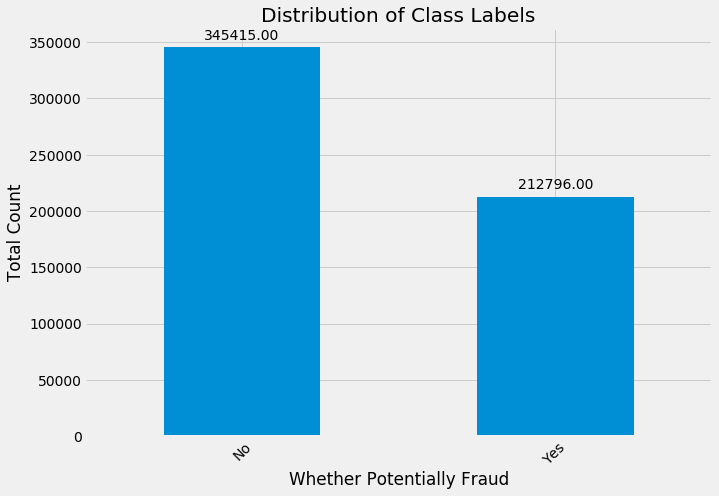

In [210]:
x_labels = ["No", 'Yes']
Pot_Fraud = MegaTrainDF.groupby("PotentialFraud")["PotentialFraud"].value_counts()
# ax = Pot_Fraud.plot(kind='bar', rot=45, figsize=(10, 7)); #rot parameter rotates the labels
# ax.set_ylabel("Total Count");
# ax.set_xlabel("Whether Potentially Fraud");
# ax.set_xticklabels(x_labels)
# value_label(ax)
# ax.set_title("Distribution of Class Labels")

# draw_plot(df, ylabel, xlabel,title,x_labels)
ax = draw_plot(Pot_Fraud, 'Total Count', 'Whether Potentially Fraud','Distribution of Class Labels',x_labels)
ax

In [121]:
Gender_Total = MegaTrainDF.groupby("Gender")["Gender"].value_counts()
Gender_Total

Gender  Gender
1       1         235097
2       2         323114
Name: Gender, dtype: int64

In [71]:
Gender_Fraud_Analysis = (Gender_Fraud/Gender_Total)*100
Gender_Fraud_Analysis

Gender,1,2
Gender,1,2
PotentialFraud,,
No,61.852767,61.897968
Yes,38.147233,38.102032


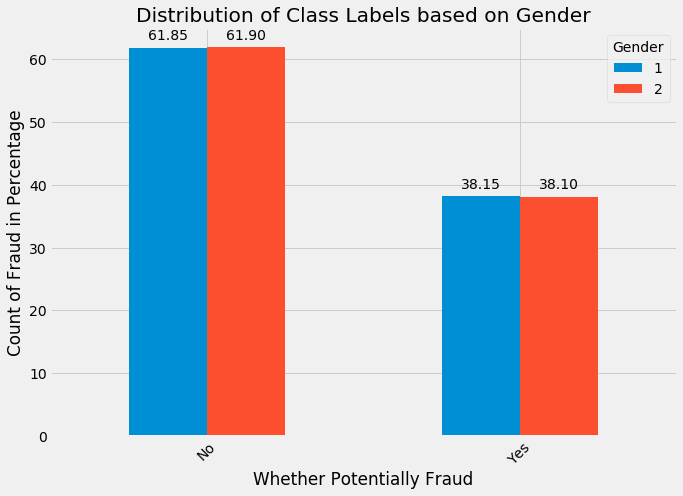

In [211]:
# Plot displays the percentage for each Gender and whether potential fraud or not
# draw_plot(df, ylabel, xlabel,title,x_labels)
ax = draw_plot(Gender_Fraud_Analysis,"Count of Fraud in Percentage","Whether Potentially Fraud","Distribution of Class Labels based on Gender",x_labels)
ax.legend(('1', '2'), title='Gender')


In [73]:
#From above analysis we can infer that the percentage of potential fraud patients is almost same for both the genders
#However, potential fraud patients are slightly higher in gender 1.

In [74]:
#Analyis based on based on 'No of Physician'
No_Physician_Fraud = pd.crosstab(MegaTrainDF['PotentialFraud'], MegaTrainDF['Num_of_Physicians'], MegaTrainDF['PotentialFraud'], aggfunc='count')
No_Physician_Fraud

Num_of_Physicians,0,1,2,3
PotentialFraud,,,,
No,931,179370,137651,27463
Yes,552,107255,88397,16592


In [75]:
Total_Patients_By_Physicians = MegaTrainDF.groupby('Num_of_Physicians')['Num_of_Physicians'].value_counts()
Total_Patients_By_Physicians

Num_of_Physicians  Num_of_Physicians
0                  0                      1483
1                  1                    286625
2                  2                    226048
3                  3                     44055
Name: Num_of_Physicians, dtype: int64

In [76]:
Num_Physician_Analysis = (No_Physician_Fraud/Total_Patients_By_Physicians)*100
Num_Physician_Analysis

Num_of_Physicians,0,1,2,3
Num_of_Physicians,0,1,2,3
PotentialFraud,,,,
No,62.778152,62.580026,60.894589,62.337987
Yes,37.221848,37.419974,39.105411,37.662013


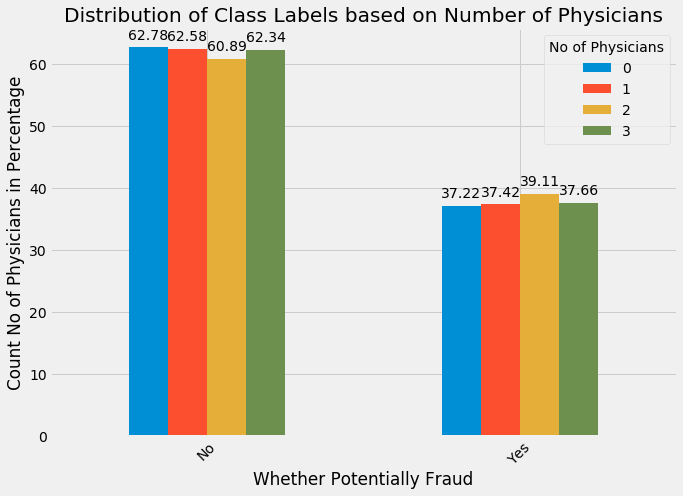

In [212]:
# Plot displays the percentage for each number of physicians and whether potential fraud or not

no_physician = (0,1,2,3)

# draw_plot(df, ylabel, xlabel,title,x_labels)
ax = draw_plot(Num_Physician_Analysis,"Count No of Physicians in Percentage","Whether Potentially Fraud","Distribution of Class Labels based on Number of Physicians",x_labels)
ax.legend(no_physician, title='No of Physicians')

In [78]:
#From the above analysis we can infer that highest number of potential fraud patients were seeing 2 physicians

In [79]:
#Multi-indexing & Analysis

In [80]:
#Potential fraud analysis based on attributes race & gender
Race_Gender_Analysis = MegaTrainDF.groupby(["Race","Gender","PotentialFraud"])["PotentialFraud"].agg(["count"])
Race_Gender_Analysis


count
Race Gender PotentialFraud        
1    1      No              123775
            Yes              75701
     2      No              168916
            Yes             102644
2    1      No               13989
            Yes               7830
     2      No               21367
            Yes              12454
3    1      No                4746
            Yes               3997
     2      No                6007
            Yes               4965
5    1      No                2904
            Yes               2155
     2      No                3711
            Yes               3050

In [81]:
#Calculating percentage value of potential fraud patients by their race & gender
Race_Gender_Analysis_Perc= (Race_Gender_Analysis['count'] / Race_Gender_Analysis.groupby(["Race","Gender"])['count'].sum()) * 100
Race_Gender_Analysis_Perc

Race  Gender  PotentialFraud
1     1       No                62.050071
              Yes               37.949929
      2       No                62.202092
              Yes               37.797908
2     1       No                64.113846
              Yes               35.886154
      2       No                63.176725
              Yes               36.823275
3     1       No                54.283427
              Yes               45.716573
      2       No                54.748451
              Yes               45.251549
5     1       No                57.402649
              Yes               42.597351
      2       No                54.888330
              Yes               45.111670
Name: count, dtype: float64

In [82]:
#From the above analysis based on pateint's race and gender we can infer that highest percentage of potential fraud
#patients belonged to race 3 & gender 1

In [83]:
#Potential fraud analysis based on attributes State & County 
State_County_Fraud_Analysis = MegaTrainDF.groupby(["State","County","PotentialFraud"])["PotentialFraud"].agg(["count"])
State_County_Fraud_Analysis


count
State County PotentialFraud       
1     0      No                 25
             Yes                31
      10     No                301
             Yes                59
      20     No                 69
             Yes                 5
      30     No                  8
             Yes                15
      40     No                 56
             Yes                 3
      50     No                 14
             Yes                 2
      60     No                 33
             Yes                 3
      70     No                265
             Yes                37
      80     No                 57
             Yes                46
      90     No                 68
             Yes                 8
      100    No                 24
             Yes                38
      110    No                 45
             Yes                34
      120    No                 80
             Yes                 9
      130    No                 33
             Yes                11
      140    No                 46
             Yes                 2
      150    No                123
             Yes                25
      160    No                104
             Yes                34
      170    No                 65
             Yes                 3
      180    No                 26
             Yes                 3
      190    No                 62
             Yes                14
      200    No                  1
      210    No                216
             Yes                18
      220    No                121
             Yes                11
      230    No                 97
             Yes                31
      240    No                152
             Yes               102
      250    No                102
             Yes                22
      260    No                107
             Yes                 1
      270    No                320
             Yes                14
      280    No                 15
             Yes                54
      290    No                 60
             Yes                19
      300    No                 82
             Yes                 7
      310    No                  3
             Yes                29
      320    No                  5
             Yes                20
      330    No                 43
             Yes                12
      340    No                198
             Yes                50
      350    No                  3
             Yes               149
      360    No                842
             Yes               707
      370    No                 10
             Yes                19
      380    No                202
             Yes                23
      390    No                 72
             Yes                12
      400    No                 33
             Yes               190
      410    No                180
             Yes                55
      420    No                 59
             Yes                 4
      430    No                  9
             Yes                25
      440    No                296
             Yes               340
      450    No                 31
             Yes                25
      460    No                 62
             Yes                26
      470    No                 30
             Yes                14
      480    No                217
             Yes                96
      490    No                 47
             Yes                 5
      500    No                283
             Yes               152
      510    No                257
             Yes                14
      520    No                  4
             Yes                15
      530    No                 26
             Yes                60
      540    No                 46
             Yes                 4
      550    No                111
             Yes                 5
      560    No                 12
             Yes               119
    

In [84]:
State_County_Fraud_Analysis_Perc = (State_County_Fraud_Analysis['count'] / State_County_Fraud_Analysis.groupby(["State","County"])['count'].sum()) * 100
State_County_Fraud_Analysis_Perc

State  County  PotentialFraud
1      0       No                 44.642857
               Yes                55.357143
       10      No                 83.611111
               Yes                16.388889
       20      No                 93.243243
               Yes                 6.756757
       30      No                 34.782609
               Yes                65.217391
       40      No                 94.915254
               Yes                 5.084746
       50      No                 87.500000
               Yes                12.500000
       60      No                 91.666667
               Yes                 8.333333
       70      No                 87.748344
               Yes                12.251656
       80      No                 55.339806
               Yes                44.660194
       90      No                 89.473684
               Yes                10.526316
       100     No                 38.709677
               Yes                61.290323
  

In [85]:
#From the above analysis based on pateint's state and county we can infer that highest percentage of potential fraud
#patients belonged to state 2 & county 100 (100%)

In [86]:
#RenalDiseaseIndicator
RenalDisease_Analysis = MegaTrainDF.groupby(["RenalDiseaseIndicator","PotentialFraud"])["PotentialFraud"].agg(["count"])
RenalDisease_Analysis

count
RenalDiseaseIndicator PotentialFraud        
0                     No              278257
                      Yes             170106
1                     No               67158
                      Yes              42690

In [87]:
RenalDisease_Analysis_Perc = (RenalDisease_Analysis['count'] / RenalDisease_Analysis.groupby(["RenalDiseaseIndicator"])['count'].sum()) * 100
RenalDisease_Analysis_Perc

RenalDiseaseIndicator  PotentialFraud
0                      No                62.060652
                       Yes               37.939348
1                      No                61.137208
                       Yes               38.862792
Name: count, dtype: float64

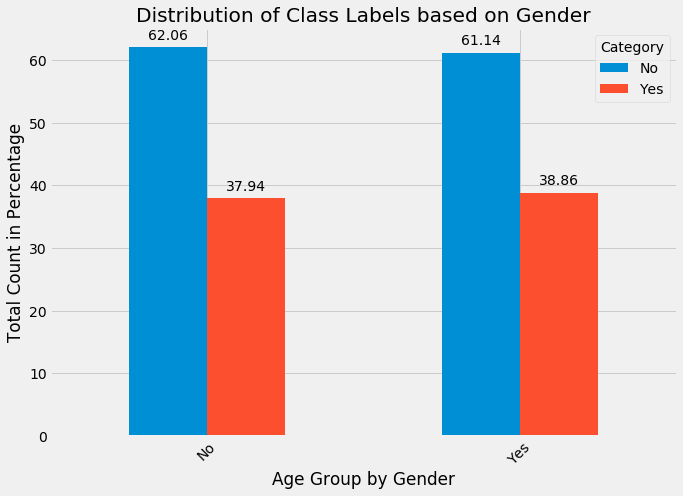

In [213]:
lst = ['No','Yes']
RenalDisease_Analysis_Per = pd.DataFrame(RenalDisease_Analysis_Perc)
RenalDisease_Analysis_Per = RenalDisease_Analysis_Per.unstack()

# draw_plot(df, ylabel, xlabel,title,x_labels)
ax = draw_plot(RenalDisease_Analysis_Per,"Total Count in Percentage","Age Group by Gender","Distribution of Class Labels based on Gender",x_labels)
ax.legend(lst, title='Category')

In [88]:
#From the above analysis based on Renal Disease indicator, we can infer that ther is no significant difference in 
#percentage potential fraud patients whether they have renal disease or not. However, count is slightly higher among
#patients with renal disease

In [215]:
bins = [0,10,20,30,40,50,60,70,80,90,100]
bin_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
MegaTrainDF["Age_Group"] = pd.cut(MegaTrainDF["Age"], bins, right=False, labels = bin_labels)
MegaTrainDF

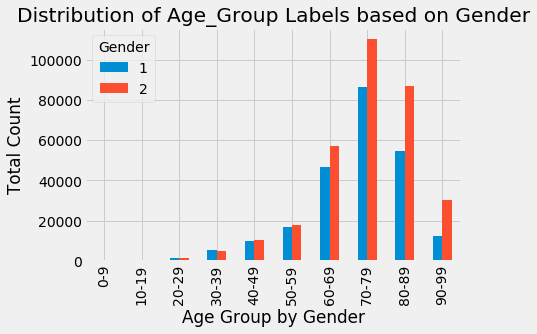

In [218]:
# count the total counts by Age Group and Gender
G_lst = [1,2]
counts = MegaTrainDF.groupby(['Age_Group', 'Gender']).Age.count().unstack()
#print(counts)

ax = counts.plot(kind='bar',stacked = False)
ax.set_ylabel("Total Count");
ax.set_xlabel("Age Group by Gender");
ax.set_title("Distribution of Age_Group Labels based on Gender")

# # draw_plot(df, ylabel, xlabel,title,x_labels)
# ax = draw_plot(counts,"Total Count","Age Group by Gender","Distribution of Class Labels based on Gender",x_labels)
ax.legend(G_lst, title='Gender')

In [90]:
#Analysing potential fraud by different age groups
AG_Analysis = MegaTrainDF.groupby(["Age_Group","PotentialFraud"])["PotentialFraud"].agg(["count"])
AG_Analysis

count
Age_Group PotentialFraud        
0-9       No                   0
          Yes                  0
10-19     No                   0
          Yes                  0
20-29     No                1714
          Yes               1027
30-39     No                6477
          Yes               3815
40-49     No               12521
          Yes               7791
50-59     No               21899
          Yes              12809
60-69     No               64451
          Yes              39288
70-79     No              122252
          Yes              75062
80-89     No               87210
          Yes              54459
90-99     No               25900
          Yes              16652

In [219]:
AG_Analysis_Perc = (AG_Analysis['count'] / AG_Analysis.groupby(["Age_Group"])['count'].sum()) * 100
AG_Analysis_Perc

Age_Group  PotentialFraud
0-9        No                      NaN
           Yes                     NaN
10-19      No                      NaN
           Yes                     NaN
20-29      No                62.531923
           Yes               37.468077
30-39      No                62.932375
           Yes               37.067625
40-49      No                61.643364
           Yes               38.356636
50-59      No                63.094964
           Yes               36.905036
60-69      No                62.128033
           Yes               37.871967
70-79      No                61.958097
           Yes               38.041903
80-89      No                61.558986
           Yes               38.441014
90-99      No                60.866704
           Yes               39.133296
Name: count, dtype: float64

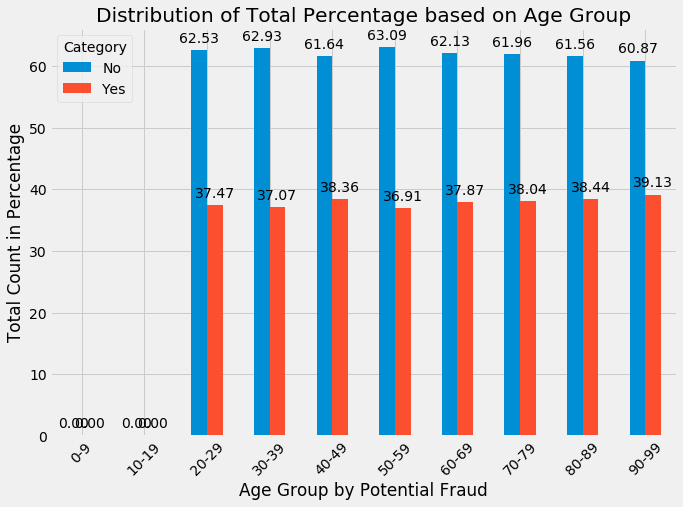

In [231]:
lst = ['No','Yes']
AG_Analysis_Per = pd.DataFrame(AG_Analysis_Perc)
AG_Analysis_Per = AG_Analysis_Per.unstack()

# draw_plot(df, ylabel, xlabel,title,x_labels)
ax = draw_plot(AG_Analysis_Per,"Total Count in Percentage","Age Group by Potential Fraud","Distribution of Total Percentage based on Age Group",bin_labels)
ax.legend(lst, title='Category')

In [87]:
#From the above analyis based on age group, we can infer that highest percetage of potential fraud patiends were in
#group 90-99

In [88]:
#DeductibleAmtPaid Analysis
DeductibleAmtPaid_Analysis = pd.crosstab(MegaTrainDF['Age_Group'], MegaTrainDF['PotentialFraud'], MegaTrainDF['DeductibleAmtPaid'], aggfunc='mean').round(1)
DeductibleAmtPaid_Analysis

PotentialFraud,No,Yes
Age_Group,,
20-29,68.1,107.8
30-39,52.4,107.1
40-49,55.3,119.3
50-59,52.0,125.7
60-69,53.0,113.4
70-79,52.0,115.2
80-89,56.9,119.3
90-99,58.5,124.6


In [89]:
#From above analysis we can infer that in each age group potentially fraud patients had paid higher deductible amount

In [233]:
#IPAnnualReimbursementAmt Anlysis
IPAnnualReimbursementAmt_Analysis = pd.crosstab(MegaTrainDF['Age_Group'], MegaTrainDF['PotentialFraud'], MegaTrainDF['IPAnnualReimbursementAmt'], aggfunc='mean').round(1)
IPAnnualReimbursementAmt_Analysis

PotentialFraud,No,Yes
Age_Group,,
20-29,5050.0,5845.5
30-39,4884.5,5467.2
40-49,5195.3,6023.3
50-59,5017.4,6048.0
60-69,4742.5,5474.6
70-79,4527.3,5383.8
80-89,5352.8,6067.6
90-99,5248.2,6599.1


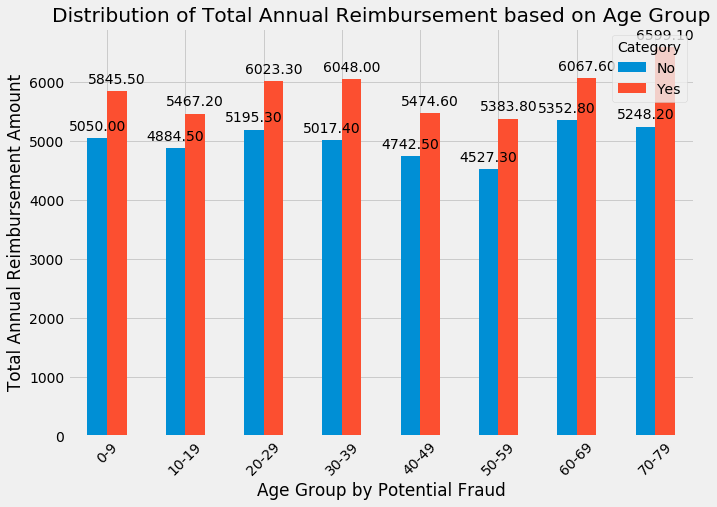

In [236]:
lst = ['No','Yes']
IPAnnualReimbursementAmt_A = pd.DataFrame(IPAnnualReimbursementAmt_Analysis)

# draw_plot(df, ylabel, xlabel,title,x_labels)
ax = draw_plot(IPAnnualReimbursementAmt_A,"Total Annual Reimbursement Amount","Age Group by Potential Fraud","Distribution of Total Annual Reimbursement based on Age Group",bin_labels)
ax.legend(lst, title='Category')

In [ ]:
#From the above analysis based on attribute IPAnnualReimbursementAmt, we can infer that for all the age groups
#the mean value of IPAnnualReimbursementAmt was more for potential fraud patients

In [229]:
#IPAnnualDeductibleAmt Analysis
IPAnnualDeductibleAmt_Analysis = pd.crosstab(MegaTrainDF['Age_Group'], MegaTrainDF['PotentialFraud'], MegaTrainDF['IPAnnualDeductibleAmt'], aggfunc='mean').round(1)
IPAnnualDeductibleAmt_Analysis

PotentialFraud,No,Yes
Age_Group,,
20-29,636.2,691.3
30-39,524.0,620.6
40-49,565.5,644.5
50-59,579.3,662.3
60-69,496.6,590.3
70-79,498.6,579.4
80-89,571.9,653.0
90-99,603.0,736.2


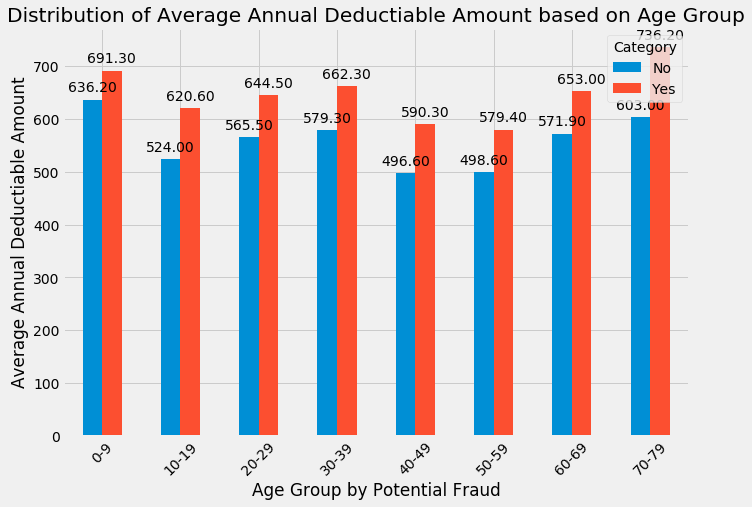

In [237]:
lst = ['No','Yes']
IPAnnualDeductibleAmt_A = pd.DataFrame(IPAnnualDeductibleAmt_Analysis)

# draw_plot(df, ylabel, xlabel,title,x_labels)
ax = draw_plot(IPAnnualDeductibleAmt_A,"Average Annual Deductiable Amount","Age Group by Potential Fraud","Distribution of Average Annual Deductiable Amount based on Age Group",bin_labels)
ax.legend(lst, title='Category')

In [ ]:
#From the above analysis based on attribute IPAnnualDeductibleAmt, we can infer that for all the age groups
#the mean value of IPAnnualDeductibleAmt was more for potential fraud patients

In [93]:
#OPAnnualReimbursementAmt Analysis
OPAnnualReimbursementAmt_Analysis = pd.crosstab(MegaTrainDF['Age_Group'], MegaTrainDF['PotentialFraud'], MegaTrainDF['OPAnnualReimbursementAmt'], aggfunc='mean').round(1)
OPAnnualReimbursementAmt_Analysis

PotentialFraud,No,Yes
Age_Group,,
20-29,2334.8,2483.5
30-39,2438.2,2401.2
40-49,2441.2,2181.5
50-59,2640.2,2465.5
60-69,2176.2,2193.2
70-79,2157.0,2166.9
80-89,2357.3,2412.3
90-99,2292.1,2479.8


In [ ]:
#From the above analysis based on attribute OPAnnualReimbursementAmt, we can infer that for most of the age groups
#the mean value of OPAnnualReimbursementAmt was more for potential fraud patients

In [238]:
#OPAnnualDeductibleAmt Analysis
OPAnnualDeductibleAmt_Analysis = pd.crosstab(MegaTrainDF['Age_Group'], MegaTrainDF['PotentialFraud'], MegaTrainDF['OPAnnualDeductibleAmt'], aggfunc='mean').round(1)
OPAnnualDeductibleAmt_Analysis

PotentialFraud,No,Yes
Age_Group,,
20-29,638.8,678.0
30-39,691.5,665.5
40-49,703.9,658.9
50-59,737.9,718.1
60-69,609.5,625.4
70-79,622.3,623.0
80-89,667.5,679.4
90-99,671.2,698.2


In [ ]:
#From the above analysis based on attribute OPAnnualDeductibleAmt, we can infer that for most of the age groups
#the mean value of OPAnnualDeductibleAmt was more for potential fraud patients

In [ ]:
#From the individual and multi-indexing analysis above we can infer that attaributes such as DeductibleAmtPaid', 
#'InscClaimAmtReimbursed','Gender', 'State', 'County', 'Age','IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 
#'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt' etc. will contribute more in predictive models

In [ ]:
#Machine Learning Model for data analysis

#Let's create build models to predict if a patient will be a potential fraud based on the analysis we did on 
#attributes above


In [ ]:
#Random Forest Classification

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [241]:
#Preparing data for classification
print(MegaTrainDF.columns.to_list())


['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'time_in_hospital', 'PotentialFraud', 'Num_of_Physicians', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis

In [242]:
#Creating X and y lists
X = MegaTrainDF[['DeductibleAmtPaid', 'InscClaimAmtReimbursed', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'Gender', 'Race', 'State', 'County', 'Age','NoOfMonths_PartACov', 'NoOfMonths_PartBCov','ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke','IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']]
y = MegaTrainDF['PotentialFraud']

print(X.shape)
print(y.shape)

(558211, 29)
(558211,)


In [243]:
#Not using the testing dataframe as I added few additional columns in the MegaTrainDF
#Splitting the data into 'train' and 'test' datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(446568, 29)
(111643, 29)
(446568,)
(111643,)


In [245]:
#Training the model
%%time
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=200, n_jobs=-1) 
rf_clf.fit(X_train, y_train) 


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [246]:
#Testing the model
y_pred = rf_clf.predict(X_test) 
print(y_pred.shape)
y_pred #these are the predictions made by the model


(111643,)


array(['No', 'No', 'Yes', ..., 'Yes', 'Yes', 'Yes'], dtype=object)

In [247]:
#Now let's calculate the accuracy of our model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))


0.7130496314144191


In [248]:
#Let's see which attribute has more important to the predction done by model
df_imp = pd.DataFrame(rf_clf.feature_importances_, index=X_train.columns, columns=["Feature Importance"]).sort_values("Feature Importance", ascending=False)
df_imp

,Feature Importance
InscClaimAmtReimbursed,0.256918
County,0.127763
State,0.111988
OPAnnualReimbursementAmt,0.095479
OPAnnualDeductibleAmt,0.089346
Age,0.082380
IPAnnualReimbursementAmt,0.031563
DeductibleAmtPaid,0.020354
Gender,0.014531
ChronicCond_Alzheimer,0.014084


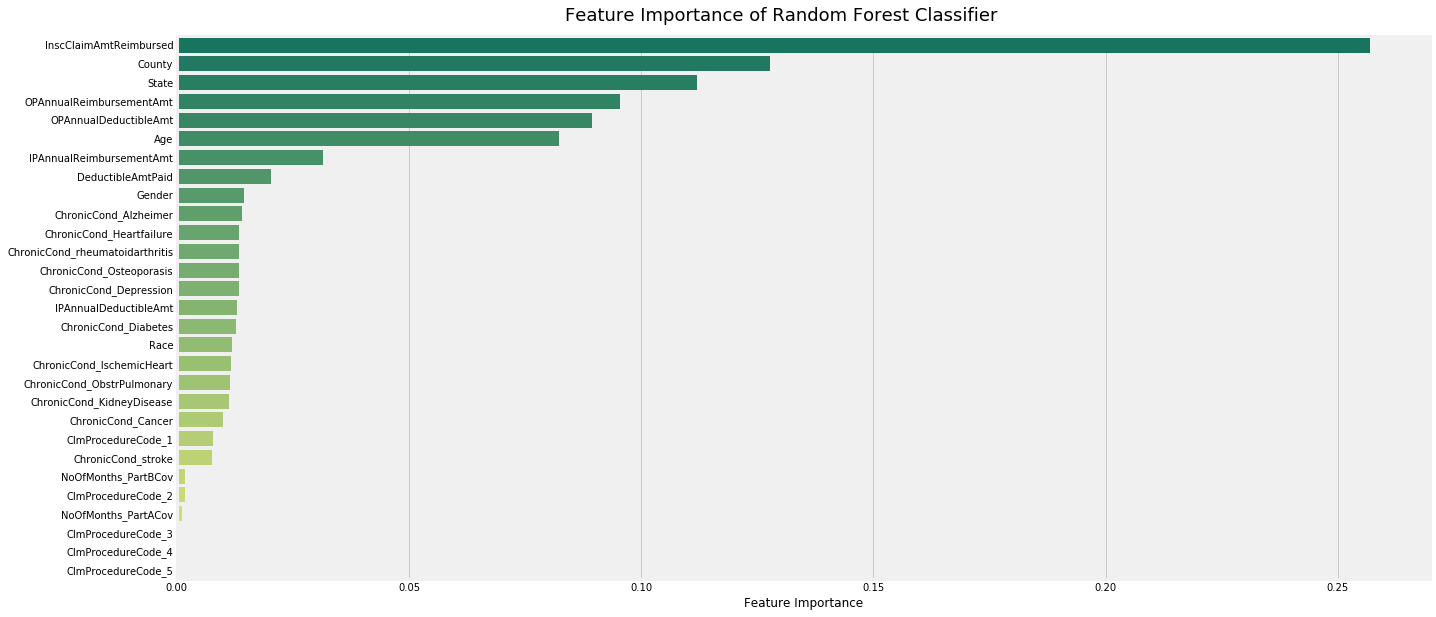

In [249]:
fig = plt.figure(figsize=(20,10))
ax = sns.barplot(x="Feature Importance", y=df_imp.index, data=df_imp, palette="summer")
fig.suptitle("Feature Importance of Random Forest Classifier", y=0.92, fontsize=18);


In [ ]:
#From the above feature importance analysis we can see that few of the features are of less importance in our
#calculation. Let's remove those features and run the model again

In [250]:
X = MegaTrainDF[['DeductibleAmtPaid', 'InscClaimAmtReimbursed','Gender', 'State', 'County', 'Age','IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']]
y = MegaTrainDF['PotentialFraud']

print(X.shape)
print(y.shape)

(558211, 10)
(558211,)


In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(446568, 10)
(111643, 10)
(446568,)
(111643,)


In [252]:
%%time
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=200, n_jobs=-1) #create an instance of the model
rf_clf.fit(X_train, y_train) #train the model on the training set

Wall time: 2min 47s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [253]:
y_pred = rf_clf.predict(X_test) #make predictions for the test set
print(y_pred.shape)
y_pred #these are the predictions made by the model

(111643,)


array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [254]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7311788468600808


In [ ]:
#By removing the irrelevant attributes from the X_train we have achieved ~73% accuracy for our model

<Figure size 2000x1500 with 0 Axes>

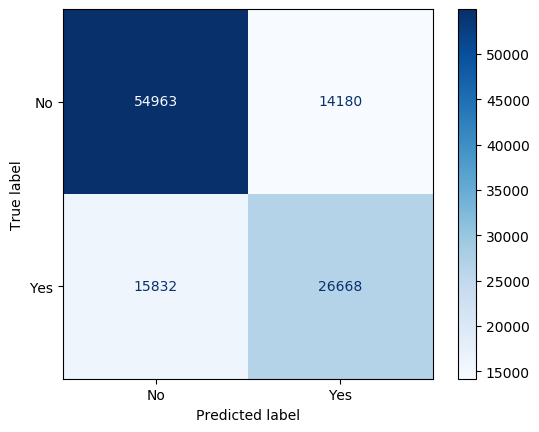

In [255]:
from sklearn.metrics import plot_confusion_matrix
with plt.style.context("default"): 
    fig = plt.figure(figsize=(20,15))
    ax = plot_confusion_matrix(rf_clf, X_test, y_test, values_format="", cmap="Blues")

In [ ]:
#K-Nearest Neighbour Model


In [ ]:
#Let's create a model using KNN method

In [256]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.min(), X_train_scaled.max())
print(X_test_scaled.min(), X_test_scaled.max())


0.0 1.0
-0.04052311659605821 1.0


In [258]:
#Training the model
#Instantiating the model
# I have selected the n_Neighbours value as 1000 as the dataset is very big ~550000
%%time
from sklearn.neighbors import KNeighborsClassifier
knn_clfr = KNeighborsClassifier(n_neighbors=1000)
knn_clfr.fit(X_train_scaled, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1000, p=2,
                     weights='uniform')

In [259]:
#Testing the model with the scaled data
y_pred = knn_clfr.predict(X_test_scaled)
print(y_pred.shape)
y_pred 


(111643,)


array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [260]:
print(accuracy_score(y_test, y_pred))

0.652848812733445


In [ ]:
#Analysis using KNN model is just ~65% accurate. However, Random Forest Classifier merthod gives a model which is ~73%
#We would prefer the Random Forest Classifier model for our analysis